In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set(style='whitegrid', context='notebook')

In [64]:
# ----------------------------------------
# Load the Wine Dataset
# ----------------------------------------
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="class")
df = pd.concat([X, y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
#Exploring the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


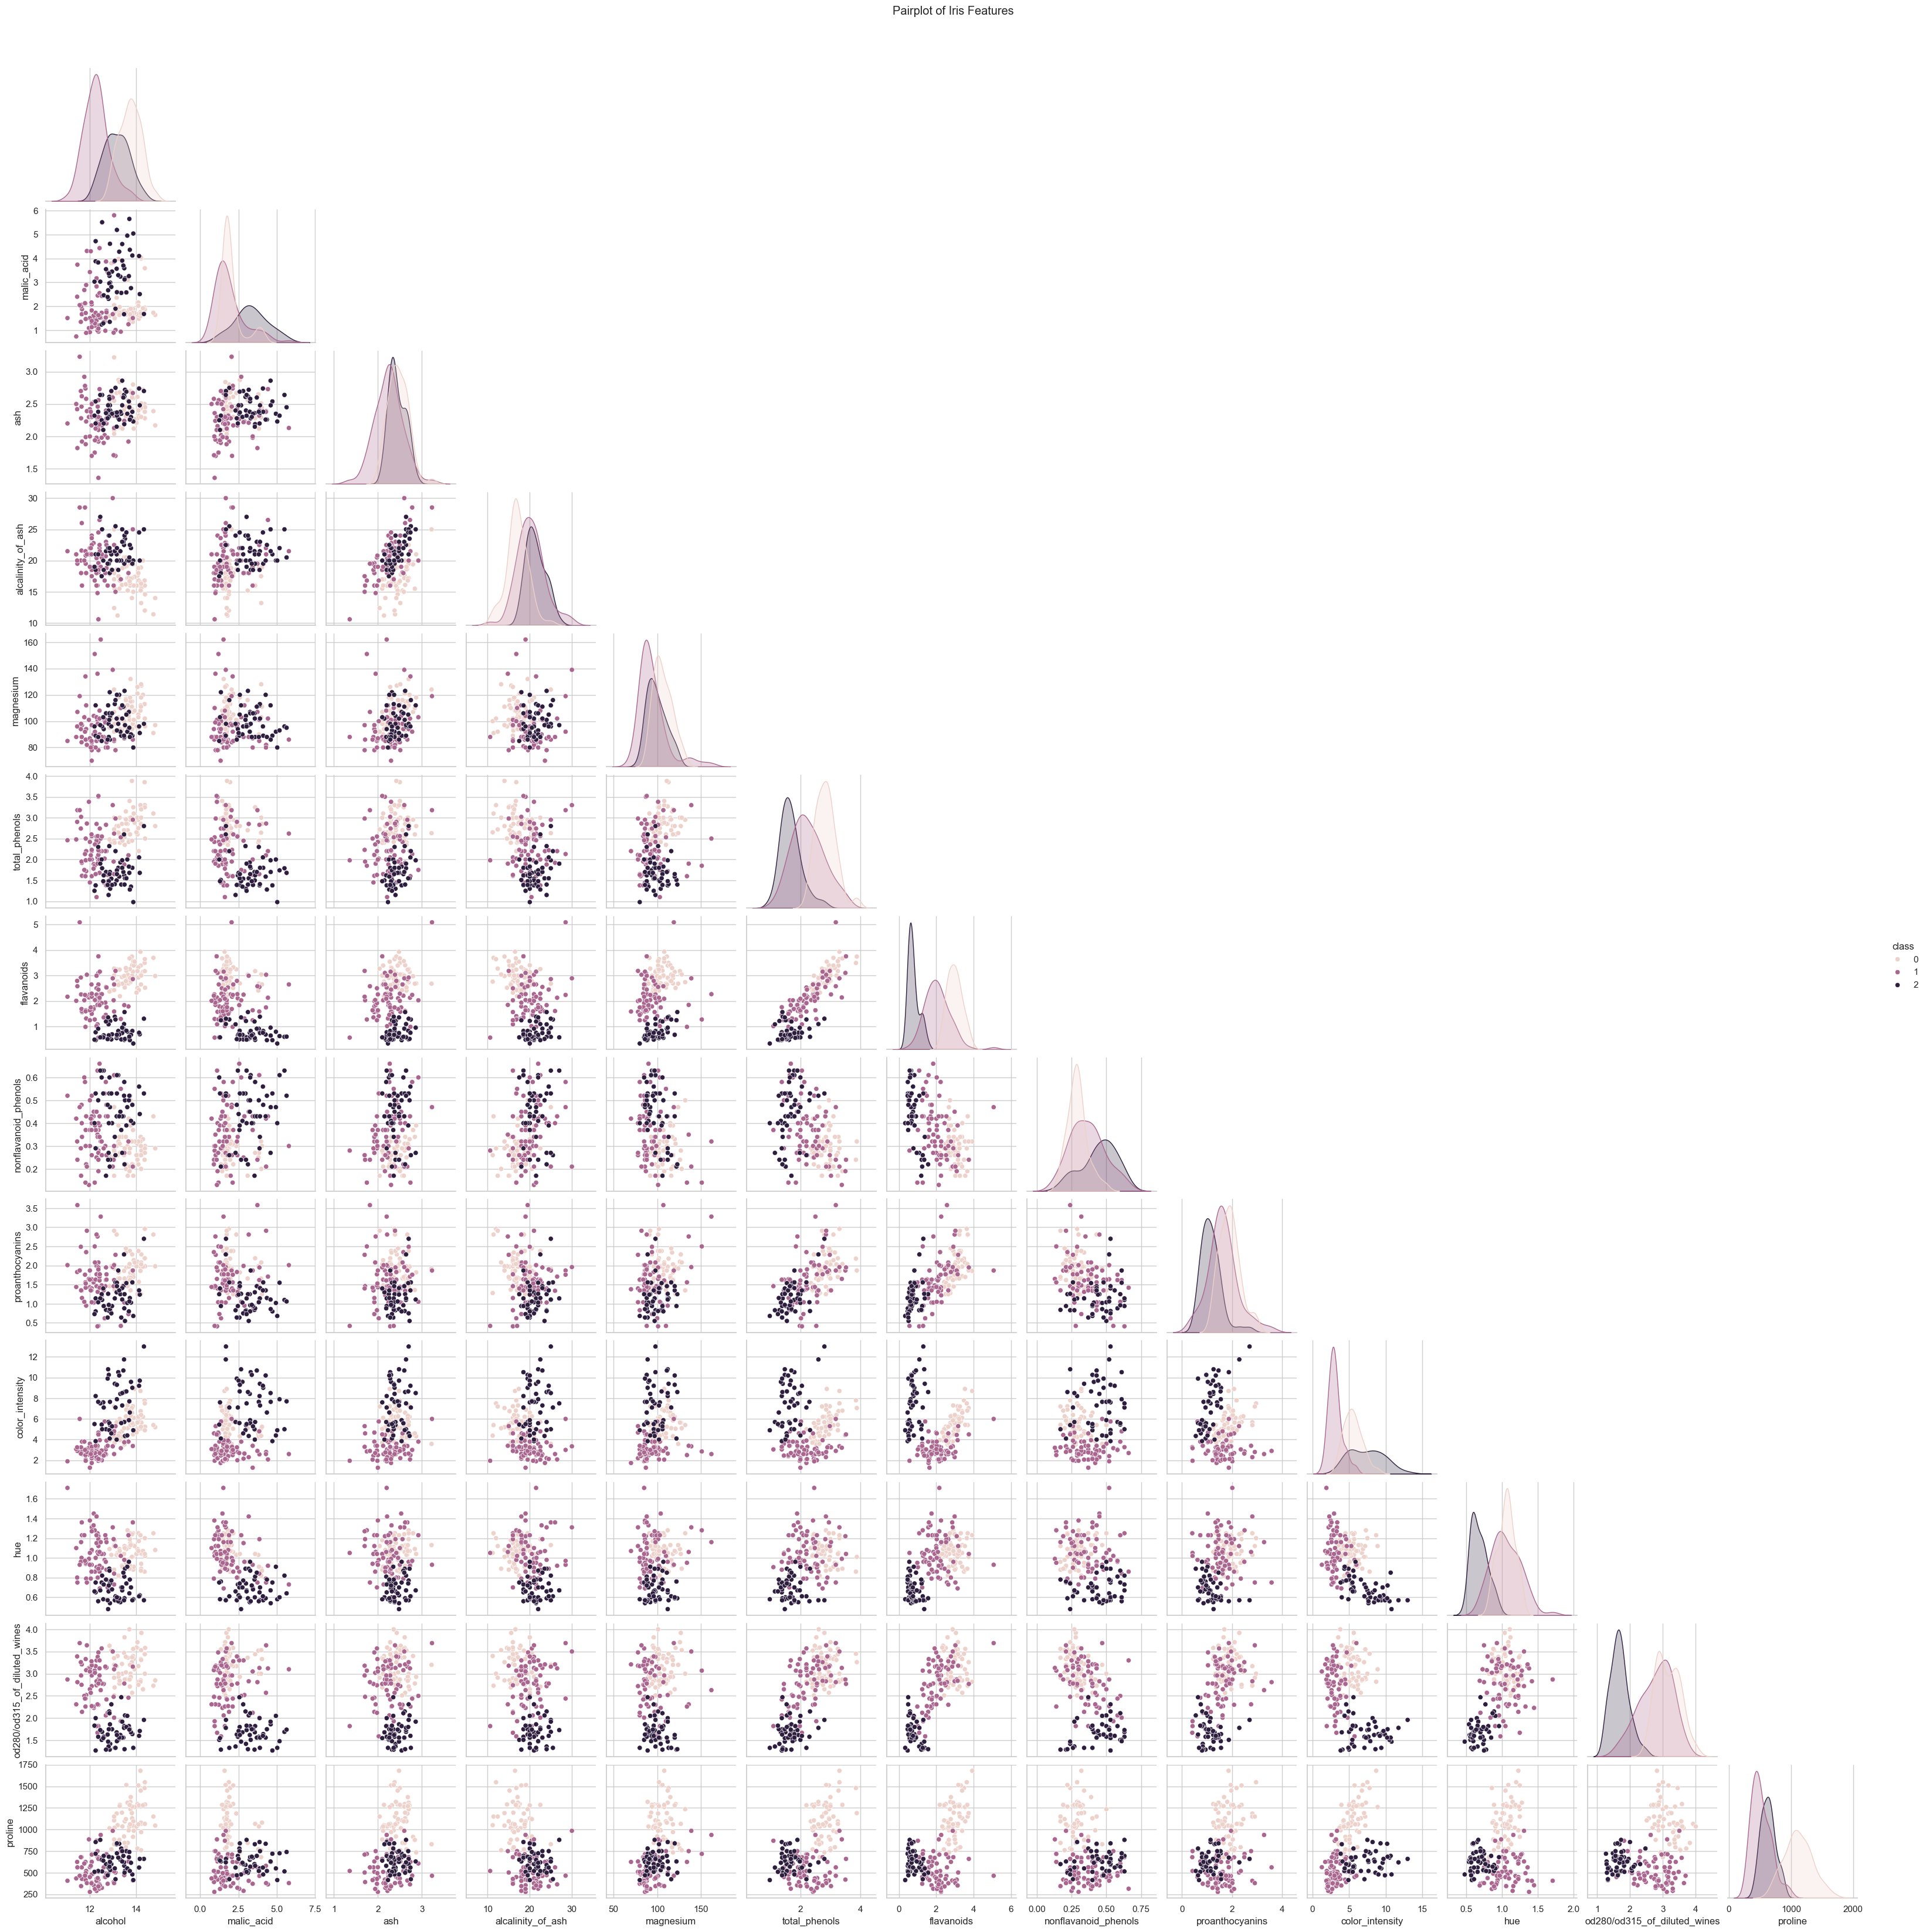

In [28]:
#Visualizing Relationships

sns.pairplot(df, hue="class", corner=True)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [32]:
#Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
#Performing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y
pca_df.head()


,PC1,PC2,class
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0


In [36]:
#Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 ])

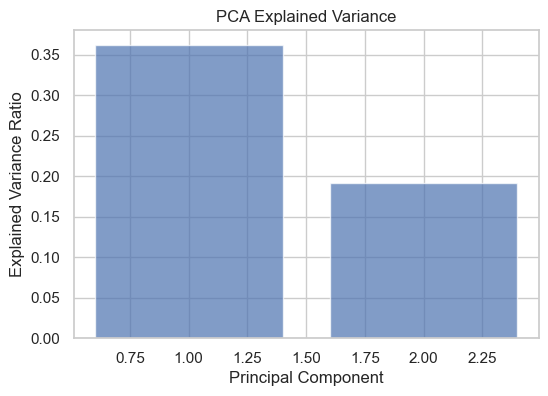

In [58]:
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_, alpha=0.7)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance')
plt.show()


In [ ]:
#2D Visualization of PCA Results and Feature Influence

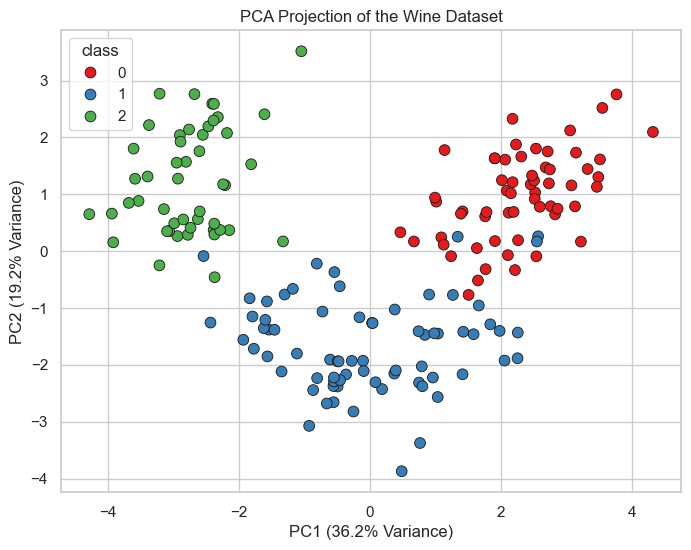

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='class', palette='Set1', s=60, edgecolor='k'
)
plt.title('PCA Projection of the Wine Dataset')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)')
plt.show()

Feature contributions to each principal component:


,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996


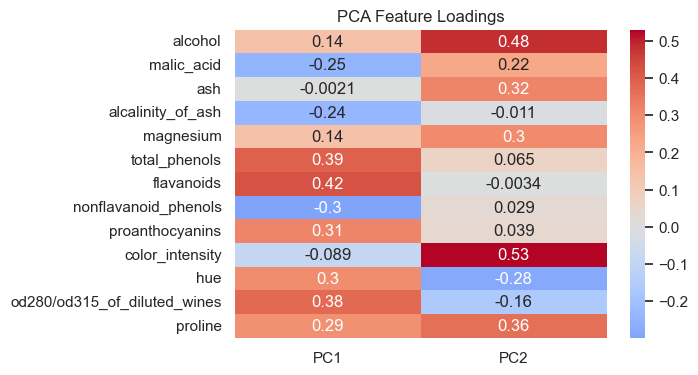

In [44]:
# Create a DataFrame of feature loadings
loadings = pd.DataFrame(
    pca.components_.T,              # transpose to have features as rows
    columns=['PC1', 'PC2'],         # name the principal components
    index=X.columns                 # use original feature names
)

print("Feature contributions to each principal component:")
display(loadings)

# Optional: visualize as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Feature Loadings')
plt.show()